In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio

import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import tensorflow as tf
print("Done")

2025-05-13 10:38:49.731674: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747132729.926125      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747132729.982469      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Done


In [2]:
!apt-get update
!apt-get install -y libsndfile1

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,927 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,211 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2

In [3]:
#preparing data set

ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']


In [4]:
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

**Ravdess**

In [5]:
import os

# Define the RAVDESS dataset path
ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

# Get the list of actor directories
ravdess_directory_list = os.listdir(ravdess)

# Lists to store file paths and corresponding emotions
file_emotion = []
file_path = []

# Emotion map (you can adjust if you have different emotion codes)
emotion_map = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'
}

# Loop through the actor directories
for dir_name in sorted(ravdess_directory_list):
    actor_folder = os.path.join(ravdess, dir_name)
    
    # Skip if it's not a directory
    if not os.path.isdir(actor_folder):
        continue
    
    # Loop through files in the actor folder
    for file_name in sorted(os.listdir(actor_folder)):
        file_full_path = os.path.join(actor_folder, file_name)
        
        # Skip if it's not a file
        if not os.path.isfile(file_full_path):
            continue
        
        # Split the filename to extract parts
        parts = file_name.split('.')[0].split('-')
        
        # Check if filename parts are valid
        if len(parts) < 3:
            print(f"Skipping invalid filename: {file_name}")
            continue
        
        # Extract emotion (3rd part of the filename)
        emotion = int(parts[2])  # 3rd element represents emotion
        
        # Check if the emotion is valid according to the emotion map
        if emotion not in emotion_map:
            print(f"Skipping invalid emotion label {emotion} for file: {file_name}")
            continue
        
        # Append the emotion and file path to the lists
        file_emotion.append(emotion_map[emotion])  # Store the emotion label
        file_path.append(file_full_path)  # Store the file path

# Print out the first 5 file paths and their corresponding emotions
for i in range(5):
    print(f"File Path: {file_path[i]}, Emotion: {file_emotion[i]}")

File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav, Emotion: neutral
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav, Emotion: neutral
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav, Emotion: neutral
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav, Emotion: neutral
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav, Emotion: calm


In [6]:
# Assuming 'actor', 'part', and 'f' need to be derived from 'file_path' and 'file_emotion'
# The 'part' variable is derived from the filename splitting process
# We'll extract 'actor' from the file path based on its directory structure

# Example: Get actor, part and other necessary data

# Assuming file_path is already filled from previous code
for i in range(5):  # Print information for first 5 files
    file_name = file_path[i].split('/')[-1]  # Extract file name from full path
    parts = file_name.split('.')[0].split('-')  # Split filename into parts
    
    if len(parts) >= 3:
        actor = parts[0]  # Actor ID (first part of the filename)
        part = parts[1]   # Part (second part of the filename)
        
        # Ensure part[2] exists before accessing it
        try:
            emotion_value = int(parts[2])  # Emotion (third part of the filename)
        except IndexError:
            emotion_value = None  # Default value if part[2] doesn't exist
        
        f = file_emotion[i]  # Emotion value corresponding to the current file from the file_emotion list

        print(f"Actor: {actor}")              # Prints actor ID (first part)
        print(f"Part: {part}")                # Prints part (second part)
        print(f"File Path: {file_path[i]}")   # Prints the full file path
        print(f"Emotion Value: {emotion_value}")  # Prints the integer emotion value (third part)
        print(f"Emotion: {f}")                # Prints corresponding emotion (from file_emotion)

Actor: 03
Part: 01
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
Emotion Value: 1
Emotion: neutral
Actor: 03
Part: 01
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav
Emotion Value: 1
Emotion: neutral
Actor: 03
Part: 01
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav
Emotion Value: 1
Emotion: neutral
Actor: 03
Part: 01
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav
Emotion Value: 1
Emotion: neutral
Actor: 03
Part: 01
File Path: /kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav
Emotion Value: 2
Emotion: calm


In [7]:
# Lists to store actor, part, and emotion values
actor_list = []
part_list = []
emotion_list = []

# Loop through the file paths
for i in range(5):  # Print information for the first 5 files
    file_name = file_path[i].split('/')[-1]  # Extract file name from full path
    parts = file_name.split('.')[0].split('-')  # Split filename into parts
    
    if len(parts) >= 3:
        actor = parts[0]  # Actor ID (first part of the filename)
        part = parts[1]   # Part (second part of the filename)
        
        # Ensure part[2] exists before accessing it
        try:
            emotion_value = int(parts[2])  # Emotion (third part of the filename)
        except IndexError:
            emotion_value = None  # Default value if part[2] doesn't exist
        
        # Append to the respective lists
        actor_list.append(actor)
        part_list.append(part)
        emotion_list.append(file_emotion[i])  # Emotion value corresponding to the current file from file_emotion list

# Now you can print values from the lists:
print(actor_list[0])        # Prints the first actor
print(part_list[0])         # Prints the first part
print(file_path[0])         # Prints the first file path
print(int(part_list[0]))    # Prints the integer value from part (be sure that part_list[0] exists)
print(emotion_list[0])      # Prints the emotion value from the emotion list

03
01
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
1
neutral


In [8]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
1  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
3  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
4     calm  /kaggle/input/ravdess-emotional-speech-audio/a...
______________________________________________
       Emotions                                               Path
1435  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
1436  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
1437  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
1438  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
1439  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
_______________________________________________
Emotions
calm         192
happy        192
sad          192
angry        192
disgust      192
fearful      192
surprised    192
neu

**CREMA-D**

In [9]:
# List all files in the CREMA-D directory
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

# Map CREMA-D emotion codes to MELD-compatible emotion labels
crema_to_meld_map = {
    'SAD': 'sadness',
    'ANG': 'anger',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'joy',
    'NEU': 'neutral'
    # No 'SUR' (surprise) in CREMA-D dataset
}

# MELD emotion classes (surprise included manually)
meld_classes = ['neutral', 'joy', 'surprise', 'sadness', 'anger', 'disgust', 'fear']

# Parse CREMA-D filenames
for file in crema_directory_list:
    full_path = os.path.join(Crema, file)
    if not os.path.isfile(full_path):
        continue

    parts = file.split('_')
    emotion_code = parts[2]
    emotion_label = crema_to_meld_map.get(emotion_code, 'Unknown')

    if emotion_label not in meld_classes:
        emotion_label = 'Unknown'

    file_emotion.append(emotion_label)
    file_path.append(full_path)

# Create DataFrames
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combine them
Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Display preview and class distribution
print(Crema_df.head())
print(Crema_df['Emotions'].value_counts())

  Emotions                                               Path
0  disgust  /kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1      joy  /kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2      joy  /kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3  disgust  /kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4  disgust  /kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav
Emotions
disgust    1271
joy        1271
sadness    1271
fear       1271
anger      1271
neutral    1087
Name: count, dtype: int64


**TESS** **DATASET**

In [10]:
# List all subdirectories in the TESS dataset
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

# Normalize TESS emotion labels to MELD format
tess_to_meld_map = {
    'angry': 'anger',
    'disgust': 'disgust',
    'fear': 'fear',
    'happy': 'joy',
    'neutral': 'neutral',
    'sad': 'sadness',
    'ps': 'surprise'  # 'ps' = pleasant surprise
}

# Iterate over emotion folders
for dir in tess_directory_list:
    full_dir = os.path.join(Tess, dir)
    if not os.path.isdir(full_dir):
        continue
    for file in os.listdir(full_dir):
        if not file.endswith('.wav'):
            continue
        emotion_code = file.split('_')[2].lower().replace('.wav', '')
        emotion_label = tess_to_meld_map.get(emotion_code, 'Unknown')
        file_emotion.append(emotion_label)
        file_path.append(os.path.join(full_dir, file))

# Create DataFrames
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Display
print(Tess_df.head())
print(Tess_df['Emotions'].value_counts())

  Emotions                                               Path
0     fear  /kaggle/input/toronto-emotional-speech-set-tes...
1     fear  /kaggle/input/toronto-emotional-speech-set-tes...
2     fear  /kaggle/input/toronto-emotional-speech-set-tes...
3     fear  /kaggle/input/toronto-emotional-speech-set-tes...
4     fear  /kaggle/input/toronto-emotional-speech-set-tes...
Emotions
fear        400
anger       400
disgust     400
neutral     400
sadness     400
surprise    400
joy         400
Name: count, dtype: int64


**SAVEE**

In [11]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

# Mapping from SAVEE file codes to MELD emotion labels
savee_to_meld_map = {
    'a': 'anger',
    'd': 'disgust',
    'f': 'fear',
    'h': 'joy',
    'n': 'neutral',
    'sa': 'sadness',
    'su': 'surprise'
}

for file in savee_directory_list:
    full_path = os.path.join(Savee, file)
    file_path.append(full_path)
    
    part = file.split('_')[1]
    emotion_code = part[:-6]  # Get the emotion code from filename (e.g., 'a', 'd', etc.)
    
    emotion_label = savee_to_meld_map.get(emotion_code, 'Unknown')
    file_emotion.append(emotion_label)

# Create DataFrames
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# Display
print(Savee_df.head())
print(Savee_df['Emotions'].value_counts())

  Emotions                                               Path
0      joy  /kaggle/input/surrey-audiovisual-expressed-emo...
1     fear  /kaggle/input/surrey-audiovisual-expressed-emo...
2      joy  /kaggle/input/surrey-audiovisual-expressed-emo...
3  disgust  /kaggle/input/surrey-audiovisual-expressed-emo...
4    anger  /kaggle/input/surrey-audiovisual-expressed-emo...
Emotions
neutral     120
fear         60
joy          60
disgust      60
anger        60
surprise     60
sadness      60
Name: count, dtype: int64


**INTEGRATION**

In [12]:
# Step 1: Integrate all datasets into one DataFrame
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Step 2: Filter only the MELD emotion classes
selected_emotions = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
data_path = data_path[data_path.Emotions.isin(selected_emotions)]

# Step 3: (Optional) Save the filtered data to a CSV file
data_path.to_csv("filtered_data.csv", index=False)

# Step 4: Display class distribution
print("Class distribution after filtering to MELD emotions:")
print(data_path.Emotions.value_counts())

Class distribution after filtering to MELD emotions:
Emotions
disgust     1923
joy         1731
sadness     1731
anger       1731
fear        1731
neutral     1703
surprise     460
Name: count, dtype: int64


In [13]:
print(data_path.Emotions.value_counts())

Emotions
disgust     1923
joy         1731
sadness     1731
anger       1731
fear        1731
neutral     1703
surprise     460
Name: count, dtype: int64


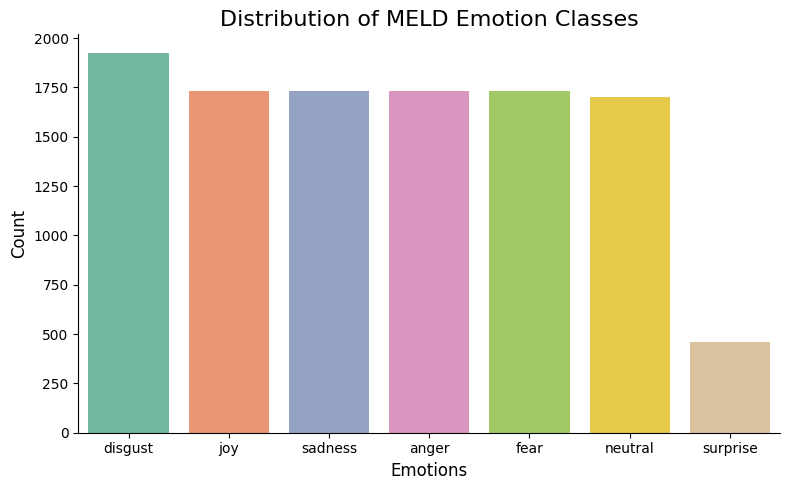

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and figure size
plt.figure(figsize=(8, 5))
plt.title('Distribution of MELD Emotion Classes', size=16)

# Create count plot
sns.countplot(x='Emotions', data=data_path, palette='Set2', order=data_path['Emotions'].value_counts().index)

# Axis labels
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

# Clean up the plot
sns.despine(top=True, right=True, left=False, bottom=False)

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
data, sr = librosa.load(file_path[0])
sr

22050

**WAVEFORM & SPECTROGRAM**

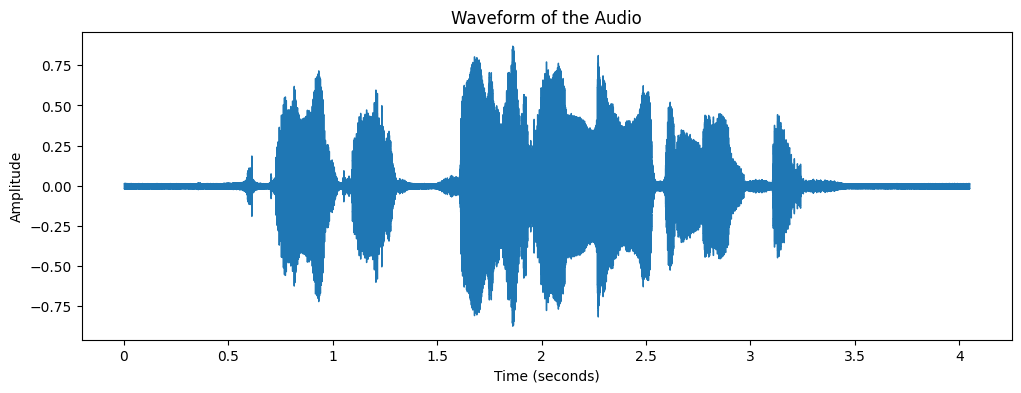

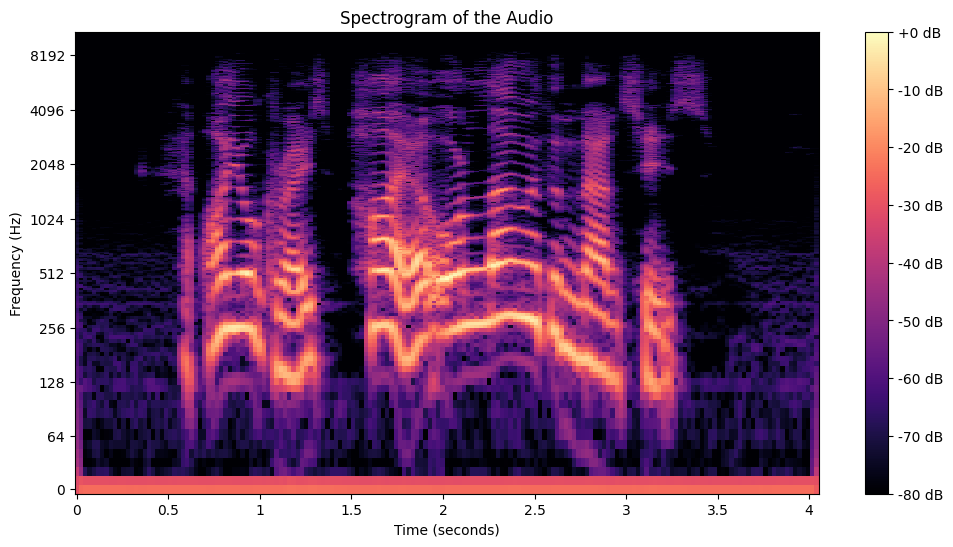

In [16]:
import librosa.display
import matplotlib.pyplot as plt

# 1. Load audio (already done in your code)
data, sr = librosa.load(file_path[0])

# 2. Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr)
plt.title('Waveform of the Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# 3. Plot the spectrogram
plt.figure(figsize=(12, 6))
D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)  # Convert to dB scale for better visualization
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram of the Audio')
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.show()

**DATA AUGMENTATION**

In [17]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
    
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

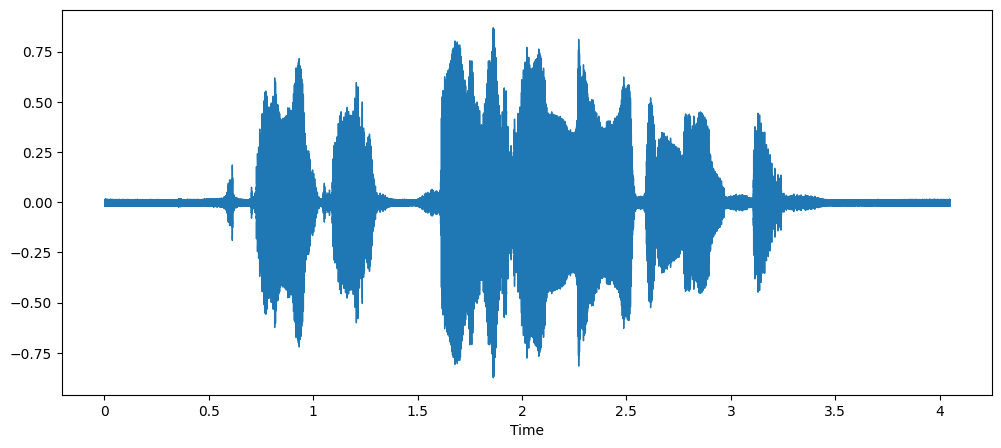

In [18]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

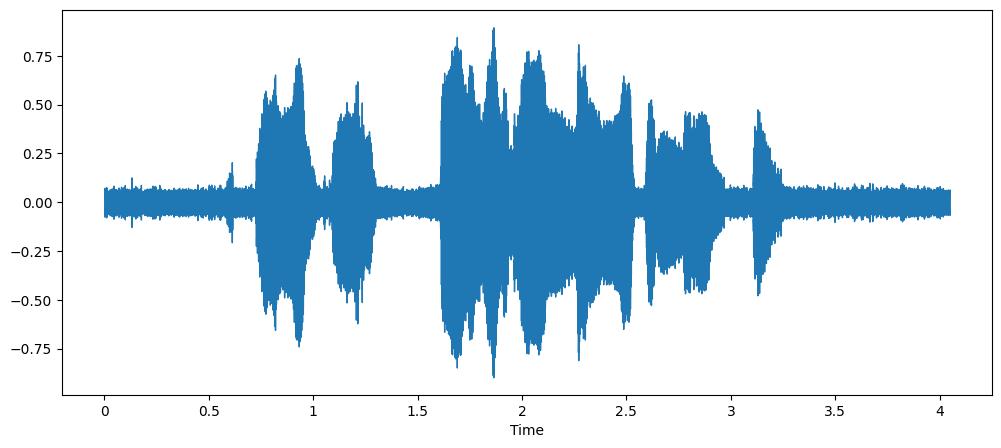

In [19]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

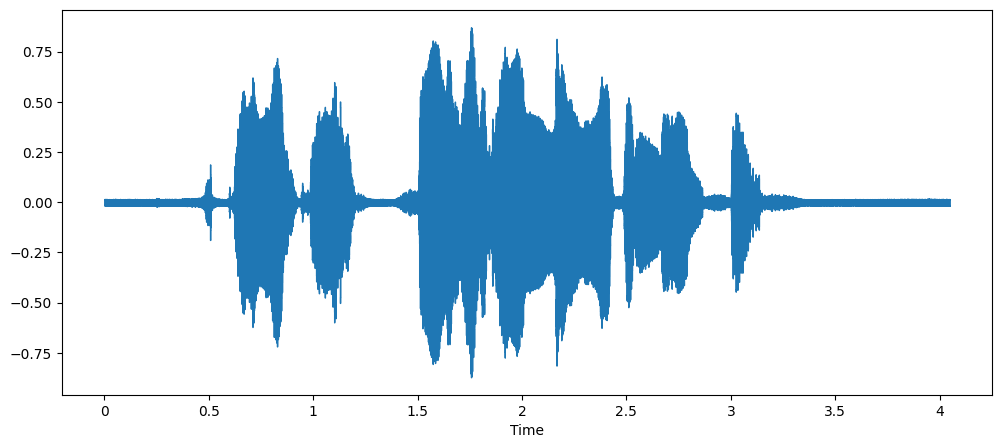

In [20]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

**FEATURE EXTRACTION**

In [21]:
import librosa
import numpy as np

# Zero Crossing Rate function
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

# Root Mean Square Error function
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

# Mel-Frequency Cepstral Coefficients function
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

# Extract all features
def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result

# Define noise and pitch functions (ensure these are implemented)
def noise(data):
    # Add noise to the audio data (implement the function as needed)
    noise_level = 0.005  # Adjust noise level as necessary
    noise_data = data + noise_level * np.random.randn(len(data))
    return noise_data

def pitch(data, sr, n_steps=2):
    # Modify the pitch of the audio data
    pitched_data = librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)
    return pitched_data

def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    
    # Extract features for the original audio
    aud = extract_features(data, sr)
    audio = np.array([aud])  # Start stacking features
    
    # Extract features for noised audio
    noised_audio = noise(data)
    aud2 = extract_features(noised_audio, sr)
    audio = np.vstack((audio, aud2))
    
    # Extract features for pitched audio
    pitched_audio = pitch(data, sr, n_steps=2)  # You can adjust n_steps as needed
    aud3 = extract_features(pitched_audio, sr)
    audio = np.vstack((audio, aud3))
    
    # Extract features for pitched + noised audio
    pitched_audio1 = pitch(data, sr, n_steps=2)  # You can adjust n_steps as needed
    pitched_noised_audio = noise(pitched_audio1)
    aud4 = extract_features(pitched_noised_audio, sr)
    audio = np.vstack((audio, aud4))
    
    return audio

In [22]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


**GET FEATURES**

In [23]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import timeit

# Assuming data_path is a pandas DataFrame with paths to the audio files and their corresponding emotions
# data_path should have at least two columns: 'Path' and 'Emotions'
# Example: data_path = pd.DataFrame({'Path': ['path_to_audio_1.wav', 'path_to_audio_2.wav'], 'Emotions': ['happy', 'sad']})

# List to store the extracted features and corresponding labels
X, Y = [], []

# Start timing the feature extraction process
start = timeit.default_timer()

# Iterate over the audio files
for path, emotion in tqdm(zip(data_path.Path, data_path.Emotions), total=len(data_path)):
    try:
        # Extract features for each audio file
        features = get_features(path)
        
        # Append features to X and corresponding emotion to Y
        for feature in features:
            X.append(feature)
            Y.append(emotion)
        
    except Exception as e:
        print(f"Error processing file {path}: {e}")
        continue

# Convert X and Y into numpy arrays
X = np.array(X)
Y = np.array(Y)

# Print completion message and time taken
print('Feature extraction complete')
stop = timeit.default_timer()
print(f'Time taken for feature extraction: {stop - start} seconds')

# Optionally, you can save the extracted features and labels as a CSV or pickle file
# For example, using pandas:
features_df = pd.DataFrame(X)
features_df['Emotion'] = Y

# Save to a CSV file
features_df.to_csv('extracted_features.csv', index=False)

# Or to a pickle file
# features_df.to_pickle('extracted_features.pkl')


100%|██████████| 11010/11010 [14:13<00:00, 12.90it/s]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (44040,) + inhomogeneous part.

In [ ]:
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path.Path
emotions = data_path.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)

In [ ]:
len(X), len(Y), data_path.Path.shape

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

In [ ]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

In [ ]:
print(Emotions.isna().any())

In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

In [ ]:
np.sum(Emotions.isna())

In [ ]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
print(Y.shape)
X.shape

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
print("y_train shape BEFORE encoding:", y_train.shape)
print("Sample y_train value:", y_train[0])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Embedding, LSTM, GRU, BatchNormalization,
    Input, Flatten, Dropout, Activation,
    Conv1D, MaxPooling1D, AveragePooling1D
)
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback with mode='max' (maximize validation accuracy)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = y_train
y_test_cat = y_test

In [ ]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(
    x_traincnn, y_train_cat,
    epochs=25,
    validation_data=(x_testcnn, y_test_cat),
    batch_size=64,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json

# Serialize model to JSON
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5 with correct extension
model.save_weights("CNN_model.weights.h5")
print("Saved model to disk")

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/kaggle/working/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/kaggle/working/best_model1_weights.h5")
print("Loaded model from disk")

In [ ]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/kaggle/working/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/kaggle/working/best_model1_weights.h5")
print("Loaded model from disk")

In [ ]:
import pickle

with open('/kaggle/working/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)
    
with open('/kaggle/working/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    

In [ ]:
from tensorflow.keras.models import model_from_json

# Load model architecture
with open("CNN_model.json", "r") as json_file:
    loaded_model_json = json_file.read()

model = model_from_json(loaded_model_json)

# Load weights
model.load_weights("CNN_model.weights.h5")
print("Model loaded successfully.")

In [ ]:
import librosa
import numpy as np

def zcr(data, frame_length, hop_length):
    return np.squeeze(librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length))

def rmse(data, frame_length=2048, hop_length=512):
    return np.squeeze(librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length))

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    return np.ravel(mfccs.T) if flatten else np.squeeze(mfccs.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result

In [ ]:
x_traincnn.shape
# Example: (num_samples, 9600, 1)

In [ ]:
def get_predict_feat(path):
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    features = extract_features(data, sr)
    
    # Ensure features have exact shape (2376,)
    desired_length = 2376
    if len(features) < desired_length:
        features = np.pad(features, (0, desired_length - len(features)), mode='constant')
    else:
        features = features[:desired_length]

    # Reshape for CNN: (samples, time_steps, channels)
    features = np.reshape(features, (1, desired_length, 1))
    return features

In [ ]:
import os

test_path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-07-01-01-01-01.wav"

# Extract emotion ID from filename
filename = os.path.basename(test_path)
parts = filename.split('-')
emotion_id = int(parts[2])  # 3rd element is the emotion ID

# Map RAVDESS emotion ID to string
ravdess_emotion_map = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sadness',
    5: 'anger',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'
}
true_emotion = ravdess_emotion_map.get(emotion_id, "Unknown")

# Get features and predict
test_features = get_predict_feat(test_path)
prediction = model.predict(test_features)
predicted_class = np.argmax(prediction)

# MELD 7-class map (should match your model output)
emotion_map = {
    0: 'neutral',
    1: 'joy',
    2: 'surprise',
    3: 'sadness',
    4: 'anger',
    5: 'disgust',
    6: 'fear'
}

print("True Emotion from filename:", true_emotion)
print("Predicted class index:", predicted_class)
print("Predicted Emotion:", emotion_map.get(predicted_class, "Unknown"))